In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

## Setup the diabetes dataset

In [17]:
data_set = pd.read_csv('diabetes.csv')

def divide_data_and_target(data_set):
    data = []
    target = []
    for elem in data_set.values:
        data.append(elem[:-1])
        target.append(elem[-1])
    return data,target
data, target = divide_data_and_target(data_set)

datasets = train_test_split(data, target, test_size=0.3, random_state=278830)
train_data, test_data, train_labels, test_labels = datasets

## Define the model with 2 hidden layers (6 neurons and 3 neurons)

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=(6, 3), activation='relu', max_iter=500)
mlp.fit(train_data, train_labels)

c:\Users\barto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(6, 3), max_iter=500)

## Get the accuracy score

In [19]:
test_data = [list(x) for x in test_data]

predictions_test = mlp.predict(test_data)
print(accuracy_score(predictions_test, test_labels))

cm = confusion_matrix(predictions_test, test_labels)

0.6666666666666666


## Create confusion matrix DataFrame to create a heatmap

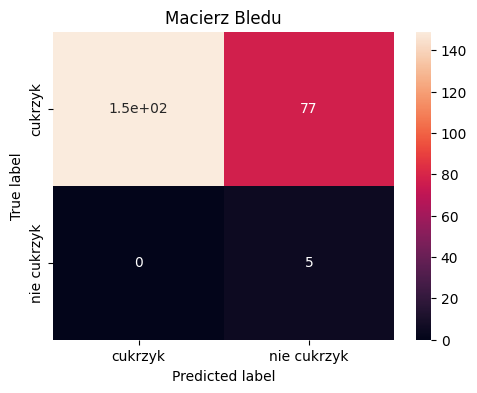

In [20]:
cm_df = pd.DataFrame(cm,
                     index = ['cukrzyk','nie cukrzyk'], 
                     columns = ['cukrzyk','nie cukrzyk'])

plt.figure(figsize=(5.5,4))
sn.heatmap(cm_df, annot=True)
plt.title('Macierz Bledu')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()